## Домашнее задание №1: ДЗ-1
50% На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

50% оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

# Task 1

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

In [25]:
df = pd.read_csv('TOP500_202206.csv')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Rank                              500 non-null    int64  
 1   Previous Rank                     461 non-null    float64
 2   First Appearance                  500 non-null    int64  
 3   First Rank                        500 non-null    int64  
 4   Name                              359 non-null    object 
 5   Computer                          500 non-null    object 
 6   Site                              500 non-null    object 
 7   Manufacturer                      500 non-null    object 
 8   Country                           500 non-null    object 
 9   Year                              500 non-null    int64  
 10  Segment                           500 non-null    object 
 11  Total Cores                       500 non-null    object 
 12  Accelera

In [27]:
df.isna().sum()

Rank                                  0
Previous Rank                        39
First Appearance                      0
First Rank                            0
Name                                141
Computer                              0
Site                                  0
Manufacturer                          0
Country                               0
Year                                  0
Segment                               0
Total Cores                           0
Accelerator/Co-Processor Cores      330
Rmax [TFlop/s]                        0
Rpeak [TFlop/s]                       0
Nmax                                  4
Nhalf                               487
HPCG [TFlop/s]                      398
Power (kW)                          309
Power Source                        309
Energy Efficiency [GFlops/Watts]    309
Memory                              499
Architecture                          0
Processor                             0
Processor Technology                  0


In [28]:
class Preprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        X[self.cols] = X[self.cols].fillna('0.0')
        X[self.cols] = X[self.cols].apply(
            lambda x: x.replace(',', '') if type(x) == str else [z.replace(',', '') for z in x]
        )
        X[self.cols] = X[self.cols].astype(float)
        return X

In [29]:
cols_to_transform = ['Rpeak [TFlop/s]', 'Power (kW)', 'Rmax [TFlop/s]']

pipe = Pipeline(
    steps=[('colpreproc', Preprocessor(cols_to_transform))]
)

In [30]:
df = pipe.transform(df)

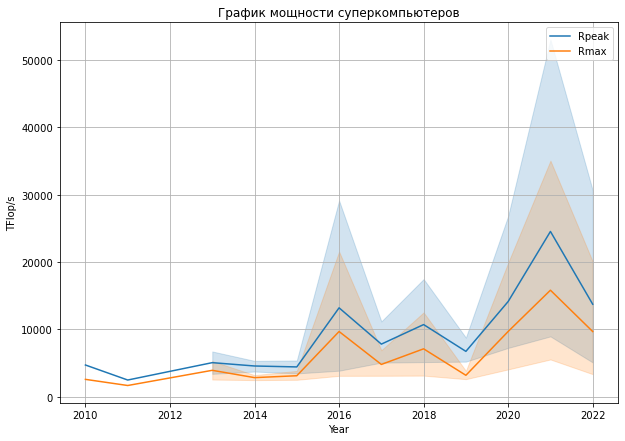

In [31]:
fig = plt.figure(figsize=(10, 7))
sns.lineplot(x='Year', y='Rpeak [TFlop/s]', data=df, label='Rpeak')
sns.lineplot(x='Year', y='Rmax [TFlop/s]', data=df, label='Rmax')
plt.title('График мощности суперкомпьютеров')
plt.ylabel('TFlop/s')
plt.grid()


In [32]:
data = df[cols_to_transform + ['Year', 'Rank']]
data = data.groupby('Year').agg('max').reset_index()

В 2025 году прогноз Rpeak [TFlop/s] = 27730
В 2025 году прогноз Rmax [TFlop/s] = 18091


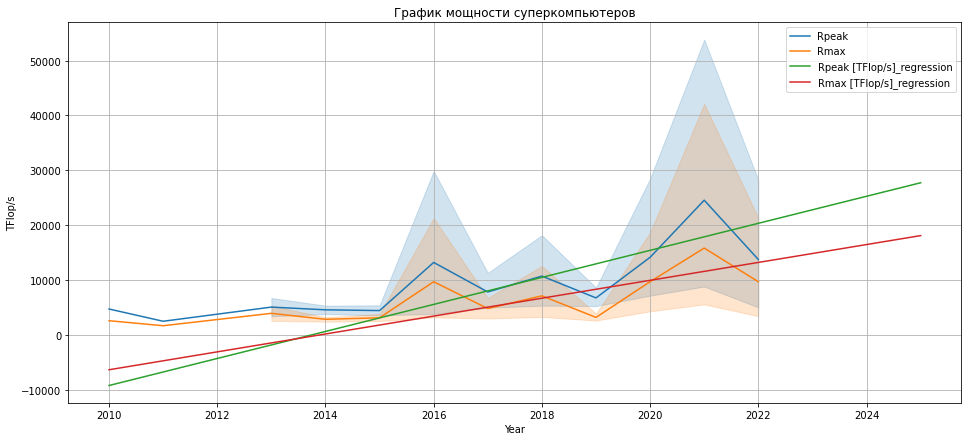

In [33]:
fig = plt.figure(figsize=(16, 7))
sns.lineplot(x='Year', y='Rpeak [TFlop/s]', data=df, label='Rpeak')
sns.lineplot(x='Year', y='Rmax [TFlop/s]', data=df, label='Rmax')

for col in ['Rpeak [TFlop/s]','Rmax [TFlop/s]']:
    lr = LinearRegression(fit_intercept=True)
    lr.fit(df['Year'].values.reshape((-1, 1)), df[col])
    data_forecast = lr.predict(np.arange(2010, 2026).reshape((-1, 1)))
    
    print(f'В 2025 году прогноз {col} = {round(data_forecast[-1])}')
    sns.lineplot(x=np.arange(2010, 2026, dtype=int), y=data_forecast, label=f'{col}_regression')
    
plt.title('График мощности суперкомпьютеров')
plt.ylabel('TFlop/s')
plt.grid()

# Task 2

Для оценки используемого электричества воспользуюсь открытыми данными.

https://ourworldindata.org/energy-production-consumption

<br>1 Watt = 1E-12 Terawatt
<br>1 Watt = 0.001 Kilowatt
<br>∴ 1 Terawatt = 1000000000 Kilowatt
<br>Source : https://www.unitsconverters.com/en/Terawatt-To-Kilowatt/Unittounit-3551-3554

In [101]:
data_energy = pd.read_csv('global-energy-substitution.csv')
data_energy.head()

,Entity,Code,Year,"Other renewables (TWh, substituted energy)","Biofuels (TWh, substituted energy)","Solar (TWh, substituted energy)","Wind (TWh, substituted energy)","Hydropower (TWh, substituted energy)","Nuclear (TWh, substituted energy)","Gas (TWh, substituted energy)","Oil (TWh, substituted energy)","Coal (TWh, substituted energy)","Traditional biomass (TWh, substituted energy)"
0,World,OWID_WRL,1800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,97.0,5556
1,World,OWID_WRL,1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,5833
2,World,OWID_WRL,1820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153.0,6111
3,World,OWID_WRL,1830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,264.0,6389
4,World,OWID_WRL,1840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356.0,6944


In [102]:
data_energy['Total  [Terawat-hours]'] = data_energy[data_energy.columns[3:]].sum(axis=1)

In [103]:
data_energy[['Year', 'Total  [Terawat-hours]']]

,Year,Total [Terawat-hours]
0,1800,5653.000000
1,1810,5961.000000
2,1820,6264.000000
3,1830,6653.000000
4,1840,7300.000000
...,...,...
69,2017,168517.345947
70,2018,172883.632935
71,2019,174284.956909
72,2020,167780.945312


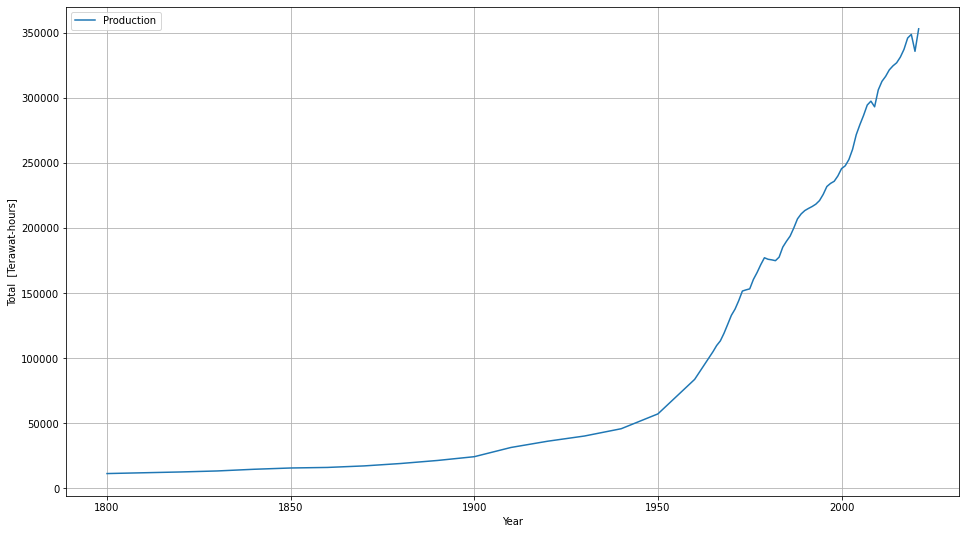

In [55]:
plt.figure(figsize=(16, 9))
sns.lineplot(data=data_energy, x='Year', y='Total  [Terawat-hours]', label='Production')

plt.grid()

В данных по потребляемой электроэнергии суперкомпьютеров есть пропуски. <br>В моем расчете будет 2 варианта оценки: <br>1) только на основании имеющихся данных <br>2) на основании имеющихся данных и пропусков заполненных средним

Также из расчета будут убраны машины которые появились только в 2022 году, тк год еще не закончился и данных по электричеству еще нет. 

## 1) вариант расчета на основании имеющихся данных

In [86]:
print(f"Только для {df[df['Power (kW)'] != 0].shape[0]} компьютера из топ 500 имеются данные о потребляемом электрчестве")

Только для 191 компьютера из топ 500 имеются данные о потребляемом электрчестве


In [87]:
top500_consumption_0 = df[df['Year'] < 2022]['Power (kW)'].sum() / 1000000000
print(f"{top500_consumption_0} Terawatts потребляют суперкомпьютеры из топ 500 для которых имеются данные по энергопотреблению")

0.00032920165 Terawatts потребляют суперкомпьютеры из топ 500 для которых имеются данные по энергопотреблению


In [109]:
res_0 = top500_consumption_0 / data_energy.iloc[73]['Total  [Terawat-hours]'] * 100
print(f"{res_0} % от всего электричества потребляют суперкомпьютеры из топ 500 с имеющимися данными об энергопотреблении")

1.8658980356385967e-07 % от всего электричества потребляют суперкомпьютеры из топ 500 с имеющимися данными об энергопотреблении


## 2) вариант расчета с заполнением пропусков

In [114]:
top500_consumption_1 = df['Power (kW)'].replace(0, df['Power (kW)'].mean()).sum() / 1000000000
print(f"{top500_consumption_1} Terawatts потребляют суперкомпьютеры из топ 500 c заполнением пропусков средним от имеющихся данных")

0.0005509070761000001 Terawatts потребляют суперкомпьютеры из топ 500 c заполнением пропусков средним от имеющихся данных


In [115]:
res_1 = top500_consumption_1 / data_energy.iloc[73]['Total  [Terawat-hours]'] * 100
print(f"{res_1} % от всего электричества потребляют суперкомпьютеры из топ 500 с заполнением пропусков средним от имеющихся данных")

3.1225129980800316e-07 % от всего электричества потребляют суперкомпьютеры из топ 500 с имеющимися данными об энергопотреблении
